In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.image as img

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from PIL import Image

from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

%matplotlib inline

In [3]:
import os
os.getcwd()

'/Users/sarahmcguire/Library/CloudStorage/Dropbox/MSU/DirectionalTransformNN/2Dproject'

In [3]:
labels = pd.read_csv('data_ECT/labels.csv')

data_path = 'data_ECT/32dirs_48thresh/'

In [4]:
labels

,Unnamed: 0,plant,species,ontogeny,total,heteroblasty
0,0,Pact1,actinia,1,17,17
1,1,Pact1,actinia,2,17,16
2,2,Pact1,actinia,3,17,15
3,3,Pact1,actinia,4,17,14
4,4,Pact1,actinia,5,17,13
...,...,...,...,...,...,...
3314,3314,Pvil4,villosa,11,15,5
3315,3315,Pvil4,villosa,12,15,4
3316,3316,Pvil4,villosa,13,15,3
3317,3317,Pvil4,villosa,14,15,2


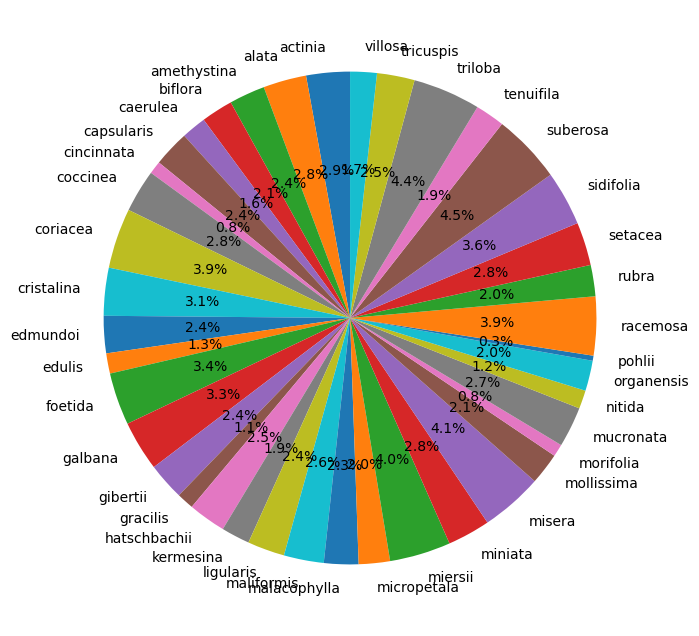

In [7]:
plt.figure(figsize = (8,8))
plt.pie(labels.groupby('species').size(), labels = labels["species"].unique(), autopct='%1.1f%%', shadow=False, startangle=90)
plt.show()

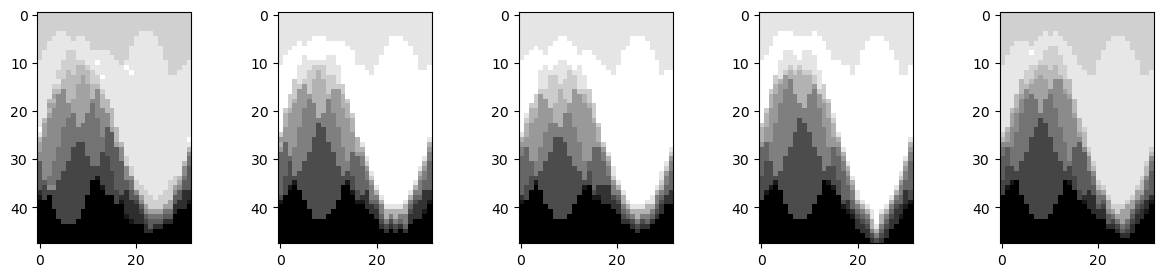

In [8]:
fig,ax = plt.subplots(1,5,figsize = (15,3))

for i,idx in enumerate(labels[labels['species'] == 'alata']['Unnamed: 0'][-5:]):
    filename = 'leaf_'+str(idx)+'.png'
    path = os.path.join(data_path,filename)
    ax[i].imshow(img.imread(path), cmap='gray')

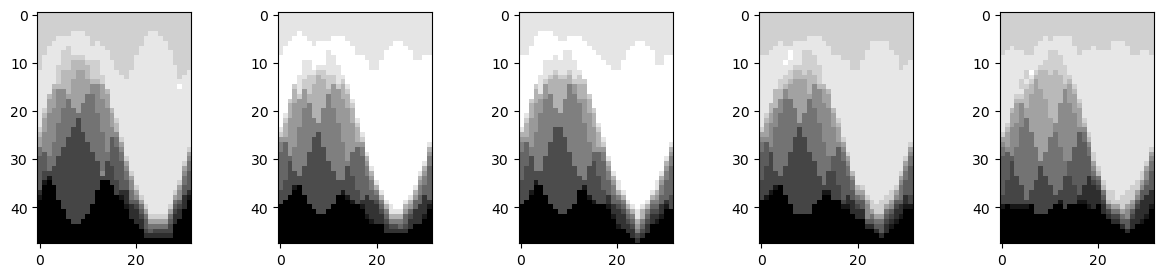

In [9]:
fig,ax = plt.subplots(1,5,figsize = (15,3))

for i,idx in enumerate(labels[labels['species'] == 'actinia']['Unnamed: 0'][-5:]):
    filename = 'leaf_'+str(idx)+'.png'
    path = os.path.join(data_path,filename)
    ax[i].imshow(img.imread(path), cmap='gray')

Dataset class for leaves

In [4]:
# Dict to map class names to indices
classes = labels["species"].unique()
idx_to_class = {i:j for i, j in enumerate(classes)}
class_to_idx = {value:key for key,value in idx_to_class.items()}

In [19]:
class SECT(object):
    """Apply smooth ECT transform to the ECT matrix sample.

    Args:
        
    """

    def __call__(self, image):

        numDirs,numThreshes = image.shape
        #new_h, new_w = self.output_size

        #top = np.random.randint(0, h - new_h + 1)
        #left = np.random.randint(0, w - new_w + 1)

        #image = image[top: top + new_h, left: left + new_w]


        return image

In [9]:
# original dataset class (for Image input data)
class LeafECTDataset(Dataset):
    def __init__(self, data, path , transform = None):
        super().__init__()
        self.data = data.values
        self.path = path
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self,index):
        label = self.data[index][2]
        label = class_to_idx[label]
        
        filename = 'leaf_'+str(index)+'.png'
        img_path = os.path.join(data_path,filename)
        image = img.imread(img_path)
        
        if self.transform is not None:
            image = self.transform(image)

        return image, label

In [42]:
filename = 'data_ECT/'+str(32)+'dirs_'+str(48)+'thresh_NPY/leaf_'+str(0)+'.npy'
A = np.load(filename)

In [7]:
# second versions of dataset class (for npy input data)
class NPYDataset(Dataset):
    def __init__(self, data, target, transform=None):
        self.data = torch.from_numpy(data).float()
        self.target = torch.from_numpy(target).long()
        self.transform = transform
        
    def __getitem__(self, index):
        x = self.data[index]
        y = self.target[index]
        
        if self.transform:
            x = self.transform(x)
        
        return x, y
    
    def __len__(self):
        return len(self.data)

In [6]:
# load in images to dataset

labels = pd.read_csv('data_ECT/labels.csv')
data_path = 'data_ECT/32dirs_48thresh_NPY/'

numpy_data = []
numpy_target = []
for filename in os.listdir(data_path):
    img_path = os.path.join(data_path,filename)
    image = np.load(img_path)
    numpy_data.append(image)
    
    index = int(filename[5:-4])
    label = labels['species'][index]
    numpy_target.append(class_to_idx[label])
    
numpy_data = np.array(numpy_data)
numpy_target = np.array(numpy_target)

In [5]:
numpy_data = np.random.randn(10, 3, 24, 24)
numpy_target = np.random.randint(0, 5, size=(10))

In [ ]:
dataset = NPYDataset(numpy_data, numpy_target)
loader = DataLoader(
    dataset,
    batch_size=10,
    shuffle=True,
    num_workers=1,
    pin_memory=torch.cuda.is_available()
)

for batch_idx, (data, target) in enumerate(loader):
    print('Batch idx {}, data shape {}, target shape {}'.format(
        batch_idx, data.shape, target.shape))

In [58]:
#data_a,_ = train_test_split(labels, stratify=labels.species, test_size=.8)

dataset = LeafECTDataset(labels, data_path)
loader = DataLoader(dataset,batch_size=10,num_workers=0,shuffle=False)
#mean = 0.
#nb_samples = 0.

TypeError: 'numpy.dtype[object_]' object is not callable

In [64]:
np.array(labels.values)

array([[0, 'Pact1', 'actinia', 1, 17, 17],
       [1, 'Pact1', 'actinia', 2, 17, 16],
       [2, 'Pact1', 'actinia', 3, 17, 15],
       ...,
       [3316, 'Pvil4', 'villosa', 13, 15, 3],
       [3317, 'Pvil4', 'villosa', 14, 15, 2],
       [3318, 'Pvil4', 'villosa', 15, 15, 1]], dtype=object)

In [56]:
A.dtype()

TypeError: 'numpy.dtype[float64]' object is not callable

In [23]:
next(iter(loader))[0].size()

torch.Size([10, 48, 32])

In [ ]:
mean = [-2.377]
std = [3.709]
#normalize images: x = (x-mean)/std
train_transform = transforms.Compose([transforms.ToPILImage(),
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean,std)])

test_transform = transforms.Compose([transforms.ToPILImage(),
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean,std)])

valid_transform = transforms.Compose([transforms.ToPILImage(),
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean,std)])

In [22]:
train, valid_data = train_test_split(labels, stratify=labels.species, test_size=0.2)


In [23]:
train_data = LeafECTDataset(train, data_path, transform = train_transform)

In [24]:
train_loader = DataLoader(dataset = train_data, batch_size = 5, shuffle=True, num_workers=0)


In [25]:
def imshow(image, ax=None, title=None, normalize=True):
    if ax is None:
        fig, ax = plt.subplots()
    image = image[0,:,:]
    # FIX NORMALIZATION PARAMS (mean and std)
    if normalize:
        mean = [5]
        std = [0.25]
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image,cmap='gray')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

In [1]:
plt.style.use('default')
fig, axes = plt.subplots(figsize=(12, 12), ncols=5)
print('training images')
for i in range(5):
    print(axes[i])
    plt.imshow(trainimages[i,0,:,:],ax=axes[i], camp='gray')
plt.show()

NameError: name 'plt' is not defined

training images
torch.Size([1, 48, 32])


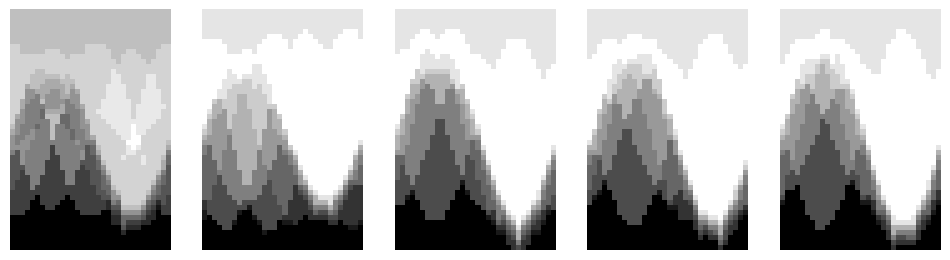

In [26]:
trainimages, trainlabels = next(iter(train_loader))

fig, axes = plt.subplots(figsize=(12, 12), ncols=5)
print('training images')
for i in range(5):
    axe1 = axes[i] 
    imshow(trainimages[i], ax=axe1, normalize=False)

print(trainimages[0].size())

# CNN

In [27]:
num_epochs = 35
batch_size = 5 # check this matches dataloader
learning_rate = 0.001

In [28]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [29]:
class CNN(nn.Module): 
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=10, kernel_size=3)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=3)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(720, 1024)
        self.fc2 = nn.Linear(1024, 40)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(x.shape[0],-1)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return x

In [30]:
model = CNN()
print(model)

CNN(
  (conv1): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=720, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=40, bias=True)
)


In [31]:
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = learning_rate)

In [ ]:
%%time
# keeping-track-of-losses 
train_losses = []
valid_losses = []

for epoch in range(1, num_epochs + 1):
    # keep-track-of-training-and-validation-loss
    train_loss = 0.0
    valid_loss = 0.0
    
    # training-the-model
    model.train()
    for data, target in train_loader:
        # move-tensors-to-GPU 
        data = data.to(device)
        target = target.to(device)
        
        # clear-the-gradients-of-all-optimized-variables
        optimizer.zero_grad()
        # forward-pass: compute-predicted-outputs-by-passing-inputs-to-the-model
        output = model(data)
        # calculate-the-batch-loss
        loss = criterion(output, target)
        # backward-pass: compute-gradient-of-the-loss-wrt-model-parameters
        loss.backward()
        # perform-a-ingle-optimization-step (parameter-update)
        optimizer.step()
        # update-training-loss
        train_loss += loss.item() * data.size(0)
        
    # validate-the-model
    model.eval()
    for data, target in valid_loader:
        
        data = data.to(device)
        target = target.to(device)
        
        output = model(data)
        
        loss = criterion(output, target)
        
        # update-average-validation-loss 
        valid_loss += loss.item() * data.size(0)
    
    # calculate-average-losses
    train_loss = train_loss/len(train_loader.sampler)
    valid_loss = valid_loss/len(valid_loader.sampler)
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
        
    # print-training/validation-statistics 
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))

# Try to load image data instead

In [3]:
labels = pd.read_csv('data_ECT_MPEG7/labels.csv')

data_path = 'data_ECT_MPEG7/32dirs_48thresh/'

In [4]:
labels.head()

,filename,shape
0,apple-1,apple
1,apple-2,apple
2,apple-3,apple
3,apple-4,apple
4,apple-5,apple


0
1
2
3
4


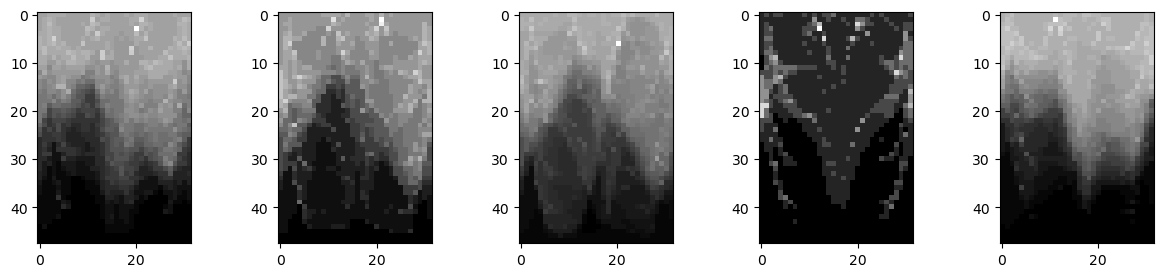

In [28]:
fig,ax = plt.subplots(1,5,figsize = (15,3))

for i,file in enumerate(labels[labels['shape'] == 'crown']['filename'][-5:]):
    print(i)
    file = str(file)+'.png'
    path = os.path.join(data_path,file)
    ax[i].imshow(img.imread(path), cmap='gray')

In [24]:
class imageECTDataset(Dataset):
    def __init__(self, data, path , transform = None):
        super().__init__()
        self.data = data.values
        self.path = path
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self,index):
        label = self.data[index][2]
        label = class_to_idx[label]
        
        file = labels[index
        filename = str(file)+'.png'
        path = os.path.join(data_path,filename)
        image = Image.open(path)
        image = np.array(image)
        
        if self.transform is not None:
            image = self.transform(image)

        return image, label

In [ ]:
dataset = LeafECTDataset(labels, data_path)
loader = DataLoader(dataset,batch_size=10,num_workers=0,shuffle=False)
mean = 0.
nb_samples = 0.

## TESTING png graysacle image dataloader

In [14]:
class ImageDataset(Dataset):
    def __init__(self, data, target, transform=None):
        self.data = torch.from_numpy(data).float()
        self.target = torch.from_numpy(target).long()
        self.transform = transform
        self.num_classes = num_classes
        self.classes = classes
        
    def __getitem__(self, index):
        x = self.data[index]
        x = x.unsqueeze(0)
        y = self.target[index]
        
        if self.transform:
            x = self.transform(x)
        
        return x, y
    
    def __len__(self):
        return len(self.data)

In [15]:
 # function to create the datasets
def create_datasets(image_type='ect'):
    """
    Function to load in images to dataset
    """
    numpy_data=[]
    numpy_target=[]

    for path, subdirs, files in os.walk(data_path):
        
        files = [f for f in files if not f[0] == '.']
        subdirs[:] = [d for d in subdirs if not d[0] == '.']
        
        for name in files:
            input_filedir = os.path.join(path, name)
            # load in the image
            image = Image.open(input_filedir).convert('L') #Converting to grayscale, using only 1 channel
            numpy_data.append(np.array(image))
            
            splitpath = os.path.normpath(input_filedir).split(os.path.sep)
            label = list(set(splitpath).intersection(classes))[0]
            numpy_target.append(class_to_idx[label])
            
    numpy_data = np.array(numpy_data)
    numpy_target = np.array(numpy_target)

    train, valid_data, y_train, y_valid = train_test_split(numpy_data, numpy_target, test_size=VALID_SPLIT)
    #print(train)
    print(y_train)
    print(train.shape)
    train_data = ImageDataset(train, y_train, transform = None)
    valid_data = ImageDataset(valid_data, y_valid, transform = None)
   
    return train_data, valid_data

In [16]:
def create_data_loaders(train_data, valid_data):
    """
    Function to build the data loaders.
    Parameters:
    :param train_data: The training dataset.
    :param valid_data: The validation dataset.
    """
    train_loader = DataLoader(dataset = train_data, batch_size = BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)

    valid_loader = DataLoader(dataset = valid_data, batch_size = BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)    

    return train_loader, valid_loader

In [17]:
data_path = '../data/testing'
BATCH_SIZE = 32
VALID_SPLIT = 0.2
NUM_WORKERS = 0




# Dict to map class names to indices
classes = []
for (dirpath, dirnames, filenames) in os.walk(data_path):
    classes.extend(dirnames)
    break
idx_to_class = {i:j for i, j in enumerate(classes)}
class_to_idx = {value:key for key,value in idx_to_class.items()}
num_classes = len(classes)
print('num_classes=',num_classes)

num_classes= 2


In [18]:
# change data_path for image data

In [19]:
device = ('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Computation device: {device}\n")

# get the training, validation and test_datasets
# image_type specifies if model should use ect data, sect transform of ect data, or original images
train_dataset, valid_dataset = create_datasets(image_type = 'image')

Computation device: cpu



KeyboardInterrupt: 